# Laboratorio 6: Análisis de tráfico de red

## Manuel Rodas 21509

### Preambulo

In [6]:
from scapy.all import *
import pandas as pd

In [2]:
packets = sniff(count=25)

In [3]:
print("Tipo de variable:", type(packets))
print("Número de paquetes capturados:", len(packets))
print("Contenido de la variable:")
packets.show()

Tipo de variable: <class 'scapy.plist.PacketList'>
Número de paquetes capturados: 25
Contenido de la variable:
0000 Ether / IP / TCP 192.168.1.26:57167 > 20.189.173.25:https PA / Raw
0001 Ether / IP / TCP 192.168.1.26:57167 > 20.189.173.25:https A / Raw
0002 Ether / IP / TCP 192.168.1.26:57167 > 20.189.173.25:https A / Raw
0003 Ether / IP / TCP 192.168.1.26:57167 > 20.189.173.25:https PA / Raw
0004 Ether / IPv6 / UDP / DNS Qry b'mobile.events.data.trafficmanager.net.'
0005 Ether / IPv6 / UDP / DNS Qry b'mobile.events.data.trafficmanager.net.'
0006 Ether / IPv6 / UDP / DNS Ans b'onedscolprdcus16.centralus.cloudapp.azure.com.'
0007 Ether / IPv6 / UDP / DNS Ans b'onedscolprdcus16.centralus.cloudapp.azure.com.'
0008 Ether / IPv6 / UDP / DNS Qry b'onedscolprdcus16.centralus.cloudapp.azure.com.'
0009 Ether / IPv6 / UDP / DNS Ans
0010 Ether / IP / TCP 192.168.1.26:57230 > 52.182.143.213:https S
0011 Ether / IP / TCP 20.189.173.25:https > 192.168.1.26:57167 A
0012 Ether / IP / TCP 20.189.173.2

In [4]:
print("Tipo de dato del primer paquete:", type(packets[0]))

Tipo de dato del primer paquete: <class 'scapy.layers.l2.Ether'>


In [5]:
print("Contenido de los primeros 5 paquetes:")
for i in range(5):
    print(f"Paquete #{i+1}")
    print(packets[i].summary())

Contenido de los primeros 5 paquetes:
Paquete #1
Ether / IP / TCP 192.168.1.26:57167 > 20.189.173.25:https PA / Raw
Paquete #2
Ether / IP / TCP 192.168.1.26:57167 > 20.189.173.25:https A / Raw
Paquete #3
Ether / IP / TCP 192.168.1.26:57167 > 20.189.173.25:https A / Raw
Paquete #4
Ether / IP / TCP 192.168.1.26:57167 > 20.189.173.25:https PA / Raw
Paquete #5
Ether / IPv6 / UDP / DNS Qry b'mobile.events.data.trafficmanager.net.'


### Analisis estadistico

In [7]:
pcap_file = "analisis_paquetes.pcap"
packets = rdpcap(pcap_file)

In [8]:
data = []

for pkt in packets:
    if IP in pkt:
        src_ip = pkt[IP].src
        dst_ip = pkt[IP].dst
        src_port = pkt.sport if hasattr(pkt, "sport") else None
        dst_port = pkt.dport if hasattr(pkt, "dport") else None
        payload_len = len(pkt[IP].payload)
        time = pkt.time
        data.append({
            "src": src_ip,
            "dst": dst_ip,
            "src_port": src_port,
            "dst_port": dst_port,
            "payload_len": payload_len,
            "time": time
        })

df = pd.DataFrame(data)

In [9]:
df.head()

,src,dst,src_port,dst_port,payload_len,time
0,10.1.10.53,84.54.22.33,53,53,941,1532199330.917674
1,84.54.22.33,10.1.10.53,53,53,64,1532199330.950107
2,10.1.10.53,84.54.22.33,53,53,955,1532199331.937777
3,84.54.22.33,10.1.10.53,53,53,64,1532199331.956635
4,10.1.10.53,84.54.22.33,53,53,992,1532199332.960504


In [10]:
df[["src", "dst", "src_port", "dst_port"]].head()

,src,dst,src_port,dst_port
0,10.1.10.53,84.54.22.33,53,53
1,84.54.22.33,10.1.10.53,53,53
2,10.1.10.53,84.54.22.33,53,53
3,84.54.22.33,10.1.10.53,53,53
4,10.1.10.53,84.54.22.33,53,53


In [ ]:

print("IPs origen únicas:")
print(df["src"].unique())


print("IPs destino únicas:")
print(df["dst"].unique())


ip_origen_frecuente = df["src"].value_counts().idxmax()
print("IP origen más frecuente:", ip_origen_frecuente)


top_dst = df[df["src"] == ip_origen_frecuente]["dst"].value_counts().idxmax()
print("IP destino más común:", top_dst)


top_dst_port = df[df["src"] == ip_origen_frecuente]["dst_port"].value_counts().idxmax()
print("Puerto destino más común:", top_dst_port)

IPs origen únicas:
['10.1.10.53' '84.54.22.33' '75.75.75.75']
IPs destino únicas:
['84.54.22.33' '10.1.10.53' '75.75.75.75']
IP origen más frecuente: 10.1.10.53
IP destino más común: 84.54.22.33
Puerto destino más común: 53


In [12]:
print("Puertos de origen usados:")
print(df[df["src"] == ip_origen_frecuente]["src_port"].value_counts())

Puertos de origen usados:
src_port
53       29
15812     1
23903     1
Name: count, dtype: int64


In [13]:
import matplotlib.pyplot as plt

Gráfica horizontal de IPs origen vs suma de payloads enviados

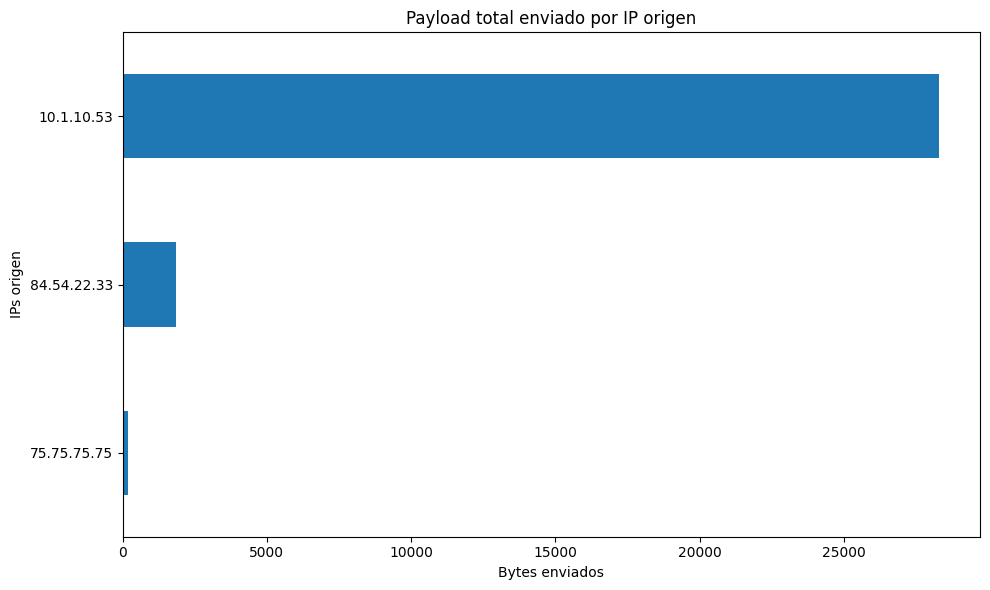

In [14]:
payloads_por_ip_origen = df.groupby("src")["payload_len"].sum().sort_values()

plt.figure(figsize=(10, 6))
payloads_por_ip_origen.plot(kind="barh")
plt.xlabel("Bytes enviados")
plt.ylabel("IPs origen")
plt.title("Payload total enviado por IP origen")
plt.tight_layout()
plt.show()


Gráfica horizontal de IPs destino vs suma de payloads recibidos

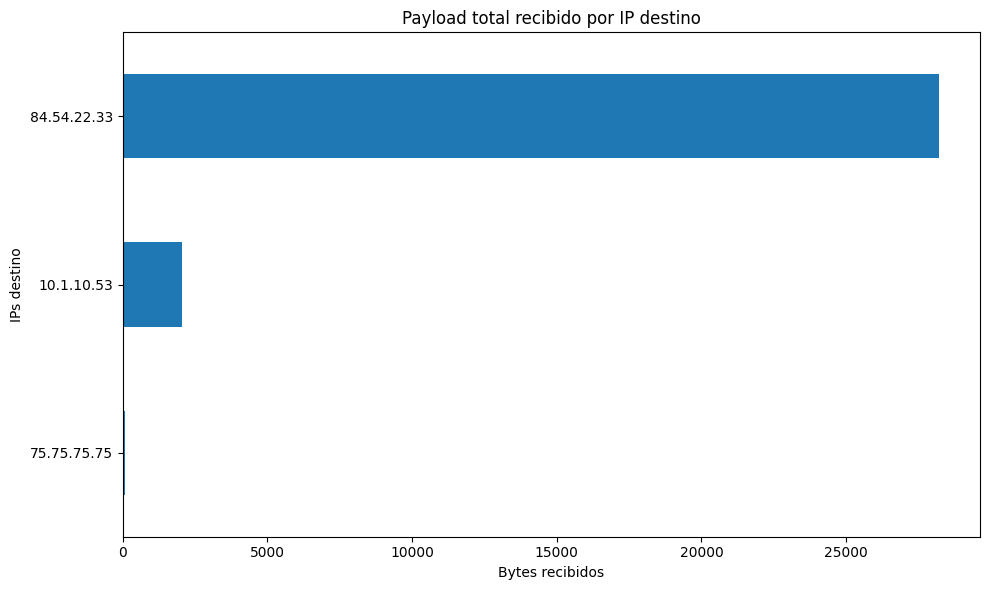

In [15]:
payloads_por_ip_destino = df.groupby("dst")["payload_len"].sum().sort_values()

plt.figure(figsize=(10, 6))
payloads_por_ip_destino.plot(kind="barh")
plt.xlabel("Bytes recibidos")
plt.ylabel("IPs destino")
plt.title("Payload total recibido por IP destino")
plt.tight_layout()
plt.show()


Gráfica horizontal de puertos origen vs suma de payloads enviados

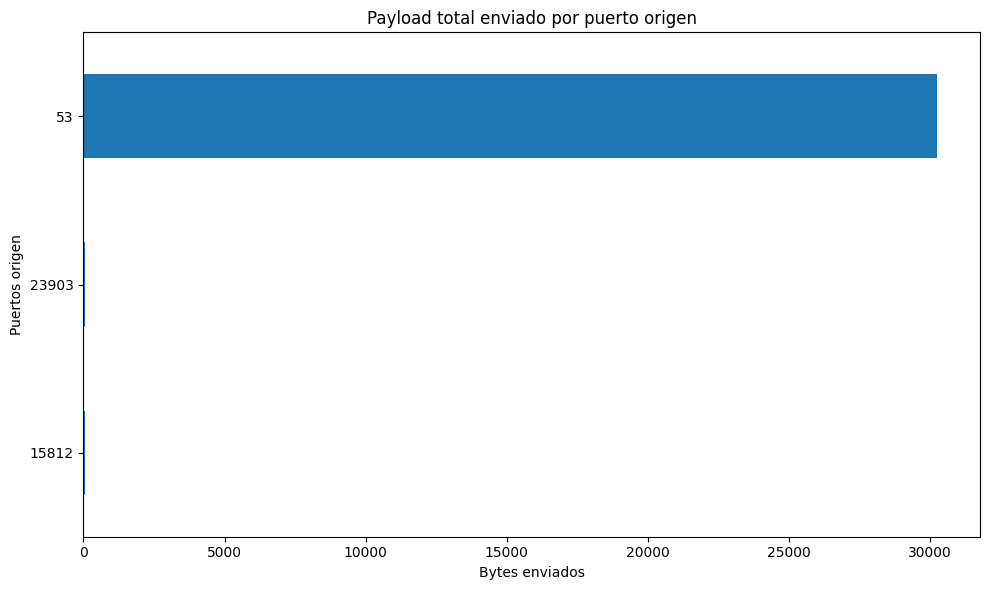

In [16]:
payloads_por_puerto_origen = df.groupby("src_port")["payload_len"].sum().sort_values()

plt.figure(figsize=(10, 6))
payloads_por_puerto_origen.plot(kind="barh")
plt.xlabel("Bytes enviados")
plt.ylabel("Puertos origen")
plt.title("Payload total enviado por puerto origen")
plt.tight_layout()
plt.show()


Gráfica horizontal de puertos destino vs suma de payloads recibidos

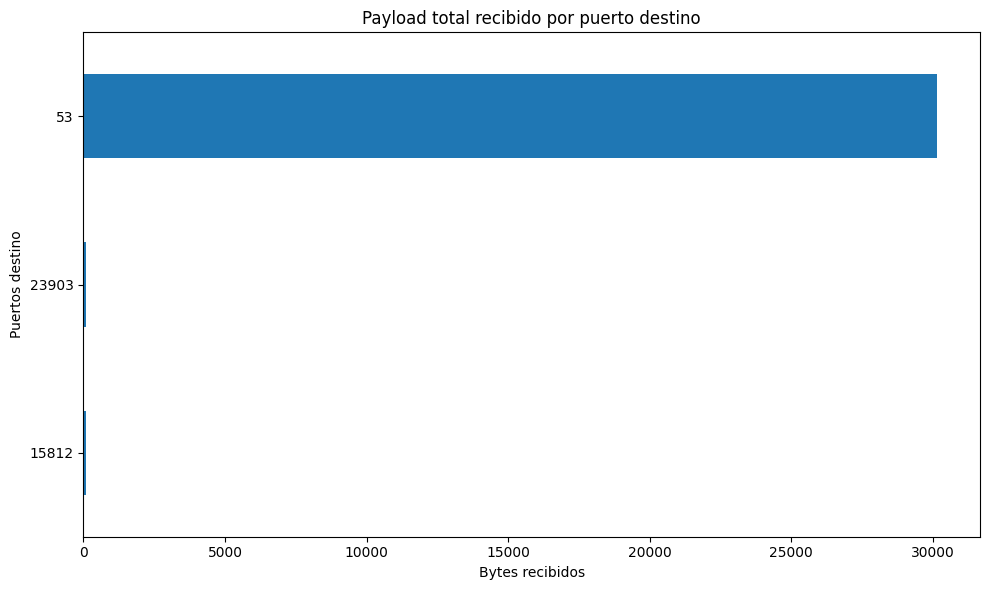

In [17]:
payloads_por_puerto_destino = df.groupby("dst_port")["payload_len"].sum().sort_values()

plt.figure(figsize=(10, 6))
payloads_por_puerto_destino.plot(kind="barh")
plt.xlabel("Bytes recibidos")
plt.ylabel("Puertos destino")
plt.title("Payload total recibido por puerto destino")
plt.tight_layout()
plt.show()


Gráfica vertical (tiempo vs payload) para IP origen más frecuente

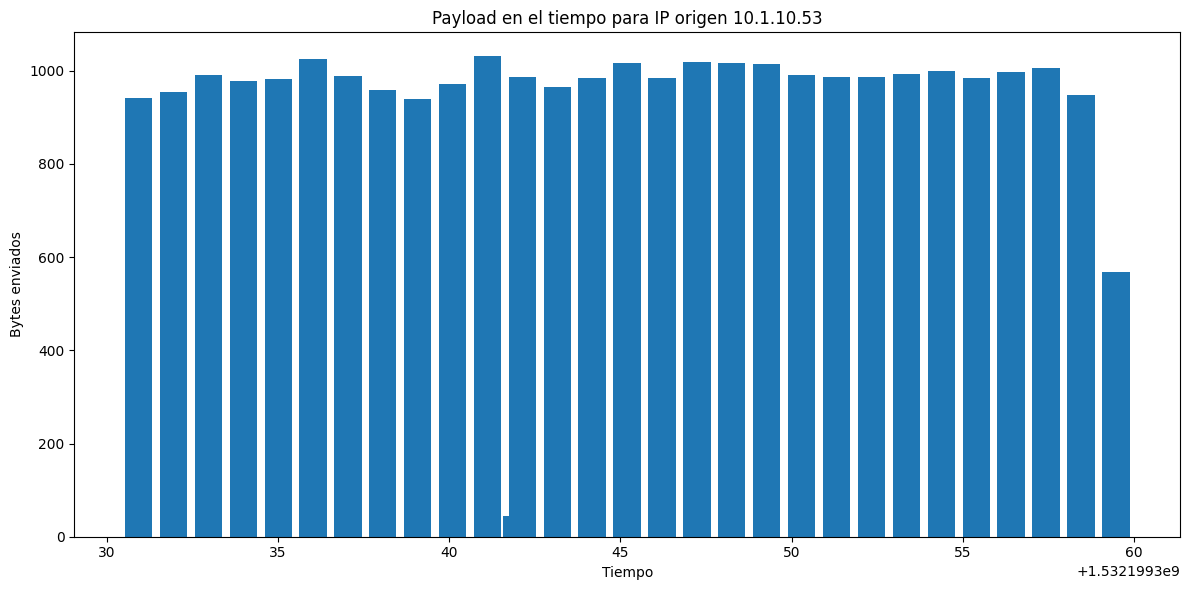

In [ ]:

df_frecuente = df[df["src"] == ip_origen_frecuente]


df_frecuente_sorted = df_frecuente.sort_values("time")

plt.figure(figsize=(12, 6))
plt.bar(df_frecuente_sorted["time"], df_frecuente_sorted["payload_len"])
plt.xlabel("Tiempo")
plt.ylabel("Bytes enviados")
plt.title(f"Payload en el tiempo para IP origen {ip_origen_frecuente}")
plt.tight_layout()
plt.show()


In [19]:
df_ip_frecuente = df[df["src"] == ip_origen_frecuente]
df_ip_frecuente.head()


,src,dst,src_port,dst_port,payload_len,time
0,10.1.10.53,84.54.22.33,53,53,941,1532199330.917674
2,10.1.10.53,84.54.22.33,53,53,955,1532199331.937777
4,10.1.10.53,84.54.22.33,53,53,992,1532199332.960504
6,10.1.10.53,84.54.22.33,53,53,978,1532199333.982248
8,10.1.10.53,84.54.22.33,53,53,983,1532199335.003376


In [20]:
agrupado = df_ip_frecuente.groupby("dst")["payload_len"].sum().sort_values(ascending=False)
agrupado = agrupado.reset_index()
agrupado.columns = ["dst", "total_payload"]
agrupado.head()


,dst,total_payload
0,84.54.22.33,28211
1,75.75.75.75,90


In [21]:
ip_destino_sospechosa = agrupado.iloc[0]["dst"]
print("IP destino sospechosa:", ip_destino_sospechosa)


IP destino sospechosa: 84.54.22.33


In [22]:
df_conversacion = df[
    (df["src"] == ip_origen_frecuente) &
    (df["dst"] == ip_destino_sospechosa)
]
df_conversacion.head()


,src,dst,src_port,dst_port,payload_len,time
0,10.1.10.53,84.54.22.33,53,53,941,1532199330.917674
2,10.1.10.53,84.54.22.33,53,53,955,1532199331.937777
4,10.1.10.53,84.54.22.33,53,53,992,1532199332.960504
6,10.1.10.53,84.54.22.33,53,53,978,1532199333.982248
8,10.1.10.53,84.54.22.33,53,53,983,1532199335.003376


In [23]:
payloads = []

for pkt in packets:
    if IP in pkt and pkt[IP].src == ip_origen_frecuente and pkt[IP].dst == ip_destino_sospechosa:
        if Raw in pkt:
            payloads.append(pkt[Raw].load)

print(f"Se encontraron {len(payloads)} payloads.")


Se encontraron 29 payloads.


In [ ]:
for i, p in enumerate(payloads[:5]):
    print(f"Payload #{i+1}:")
    print(p[:100]) 
    print("-" * 40)


Payload #1:
b'\xef\xbf\xbdPNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01b\x00\x00\x00\xef\xbf\xbd\x08\x06\x00\x00\x00(\xef\xbf\xbdTR\x00\x00:\xef\xbf\xbdIDATx\xef\xbf\xbd\xef\xbf\xbd\t|T\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd;K\x12\x08;\x08\xef\xbf\xbd\nE\xef\xbf\xbd\xef\xbf\xbd$\x19\xef\xbf\xbd\xef\xbf\xbdZ'
----------------------------------------
Payload #2:
b':\xef\xbf\xbdle:\xc7\xa9\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\x0c\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd:|\x11\xef\xbf\xbdX\xef\xbf\xbd\xef\xbf\xbdq.e\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbda\x120\xef\xbf\xbdJ}4\n9$vz\xef\xbf\xbdR\xef\xbf\xbduO/\xef\xbf\xbd\xef\xbf\xbd;\xc7\xab]\xef\xbf\xbd\xef\xbf\xbdM"\xef\xbf\xbdrT'
----------------------------------------
Payload #3:
b"\xef\xbf\xbd\xef\xbf\xbd^n\xef\xbf\xbd''\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd$\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbdR\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\x17\xef\xbf\xbd>Epou\xef\xbf\xbd\xef\xbf\xbd$\xef\xbf\xbd\xef\xbf\xbdM\xe

In [25]:
print(f"Puerto destino sospechoso: {top_dst_port}")

Puerto destino sospechoso: 53


Durante el análisis de tráfico, se logro detectar que la IP origen más frecuente envió datos al puerto 53 (DNS), pero los payloads contienen información binaria, incluyendo una imagen en formato PNG, lo cual no es típico de una comunicación DNS normal. Este comportamiento sugiere un posible uso de DNS tunneling para transmitir datos encubiertos, lo cual puede indicar una actividad sospechosa o maliciosa en la red.